Note from the Authors

----
This file contains the use of modification to functions in the deconvolveR package that adds
1. Homoskedastic error for Normal Exmple (done)
2. Heteroskedastic error for Normal Exmple (not done)


----


# Deconvolution

Problem Setup: We observe $\{\tilde{x}_i\}$ and $\{\tilde{y}_i\}$ with known addative form 
$$
\tilde{x}_i = x_i + \epsilon_i, \\
\tilde{y}_i = y_i + \nu_i,
$$
and known error distributions $\epsilon_i\sim N(0, \sigma_i^2)$ and $\nu_i\sim N(0, \gamma_i^2)$.

The denoised data points come from distributions $x_i\sim F_x$ and $y_i\sim F_y$. We want to test 

$$
H_0: F_x = F_y
$$

I found an interesting (AND RECENT) paper on this by [Brad Efron in Biometrika](https://academic-oup-com.ezp-prod1.hul.harvard.edu/biomet/article/103/1/1/2390141) from 2016 where they take the approach of assuming an exponential family of distributions on ${F}_x$ and ${F}_y$ and proceeding to estimate them using an Empirical Bayes approach. 
In it they cite a broad litterature on the deconvolution problem, in particular they cite [Stefanski L. & Carroll R. J. (1990)](https://www.tandfonline.com/doi/abs/10.1080/02331889008802238) as a prime example of estimators with relatively good asymptotic properties. 

In [1]:
library('deconvolveR')
set.seed(238923) ## for reproducibility
N <- 5000
theta <- rnorm(N, 0, 4)
X <- theta + rnorm(n = N, 0, 1)
tau <- seq(-20, 20, 0.1)
result <- deconv(tau = tau, X = X, family = 'Normal', pDegree = 5, c0 = 0)

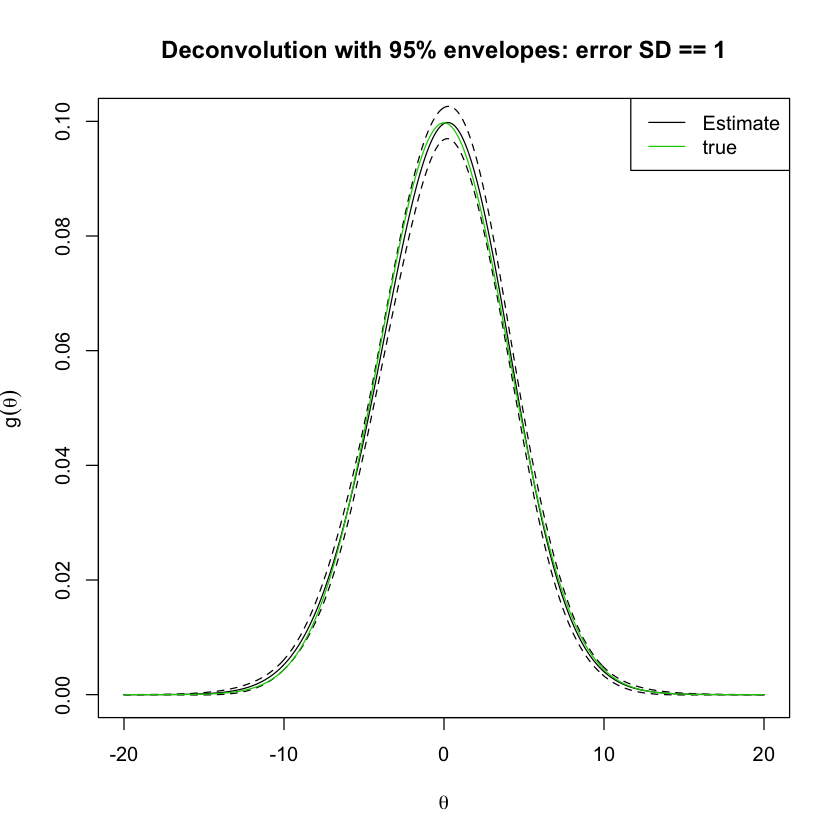

In [2]:
plot(result$stats[,1], result$stats[,2]/0.1, type = 'l', ylim = c(0, 0.1), main = 'Deconvolution with 95% envelopes: error SD == 1',
    xlab = expression(theta), ylab = expression(g(theta)))
lines(result$stats[,1], (result$stats[,2] + 2*result$stats[,3])/0.1 , type = 'l', lty = 2)
lines(result$stats[,1], (result$stats[,2] - 2*result$stats[,3])/0.1 , type = 'l', lty = 2)
lines(tau, dnorm(tau, 0, 4), col = 3)
legend('topright', c('Estimate', 'true'), col = c(1, 3), lty = 1)


# TO DO: add input for multiple error noises


In [3]:
source('../src/decon_hom_err.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file '../src/decon_hom_err.R': No such file or directory”

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


# Modify Deconvolution with generic (but shared) SDs

In [7]:
library('deconvolveR')
set.seed(238923) ## for reproducibility
N <- 5000
theta <- rnorm(N, 0, 4)
X <- theta + rnorm(n = N, 0, 3)
tau <- seq(-20, 20, 0.1)
result <- deconv_hom_err(tau = tau, X = X, family = 'Normal', pDegree = 5, c0 = 0, sd = 3)

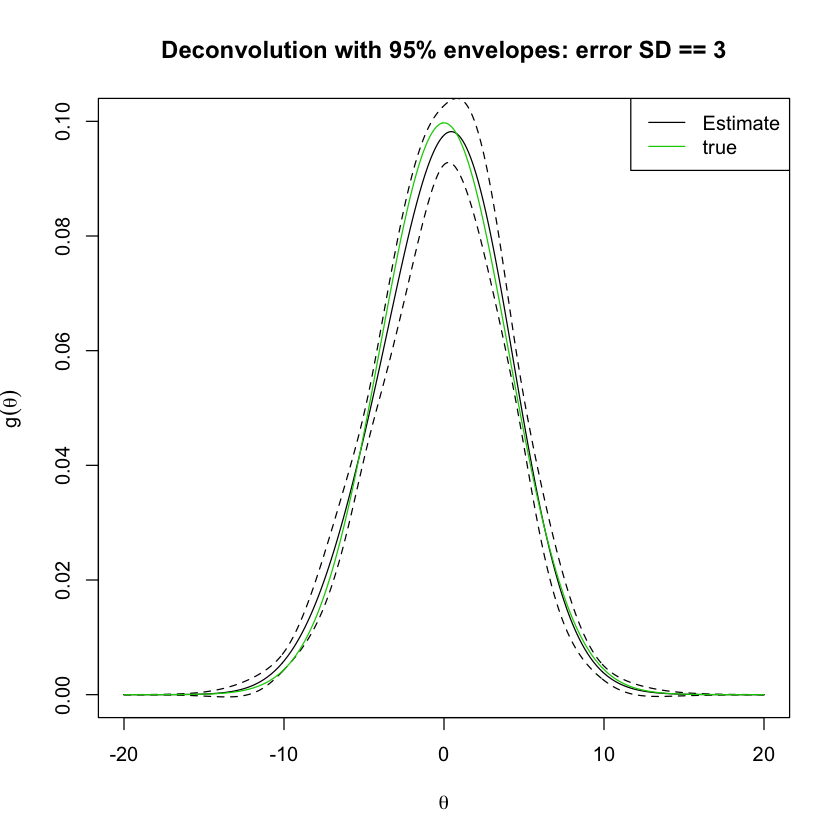

In [8]:
plot(result$stats[,1], result$stats[,2]/0.1, type = 'l', ylim = c(0, 0.1), main = 'Deconvolution with 95% envelopes: error SD == 3',
    xlab = expression(theta), ylab = expression(g(theta)))
lines(result$stats[,1], (result$stats[,2] + 2*result$stats[,3])/0.1 , type = 'l', lty = 2)
lines(result$stats[,1], (result$stats[,2] - 2*result$stats[,3])/0.1 , type = 'l', lty = 2)
lines(tau, dnorm(tau, 0, 4), col = 3)
# lines(tau, dnorm(tau, 0, 4.8), col = 2)
legend('topright', c('Estimate', 'true'), col = c(1, 3), lty = 1)


Warning message in rmvnorm(100, result$stats[, 2], result$cov.g):
“sigma is numerically not positive semidefinite”

NULL

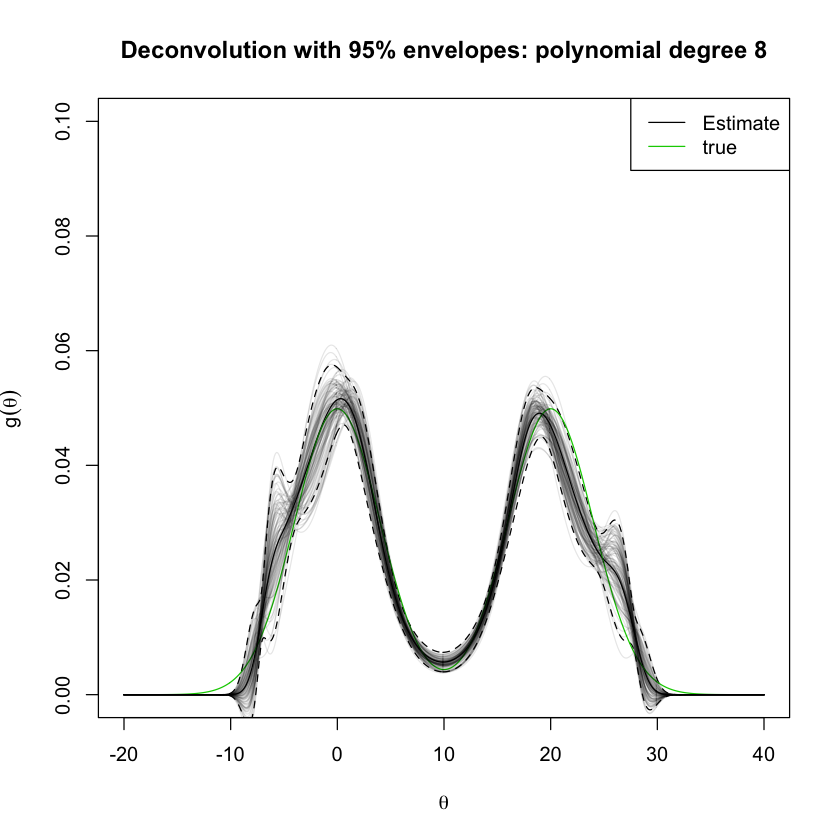

In [69]:
library('deconvolveR')
set.seed(238923) ## for reproducibility
N <- 5000
Z = sample(c(0, 1), N, replace = TRUE)
theta <- Z*rnorm(N, 0, 4) + (1-Z)*rnorm(N, 20, 4)
X <- theta + rnorm(n = N, 0, 3)
tau <- seq(-20, 40, 0.1)
result <- deconv2(tau = tau, X = X, family = 'Normal', pDegree = 8, c0 = 0, sd = 3)
library('mvtnorm')
post = rmvnorm(100, result$stats[,2], result$cov.g)

plot(result$stats[,1], result$stats[,2]/0.1, type = 'l', ylim = c(0, 0.1), main = 'Deconvolution with 95% envelopes: polynomial degree 8',
    xlab = expression(theta), ylab = expression(g(theta)))
lines(result$stats[,1], (result$stats[,2] + 2*result$stats[,3])/0.1 , type = 'l', lty = 2)
lines(result$stats[,1], (result$stats[,2] - 2*result$stats[,3])/0.1 , type = 'l', lty = 2)
lines(tau, 0.5*dnorm(tau, 0, 4) + 0.5*dnorm(tau, 20, 4), col = 3)
legend('topright', c('Estimate', 'true'), col = c(1, 3), lty = 1)
apply(post, 1, function(x) lines(tau, x/0.1, col = rgb(0,0,0, alpha = 0.1)))


Warning message in rmvnorm(100, result$stats[, 2], result$cov.g):
“sigma is numerically not positive semidefinite”

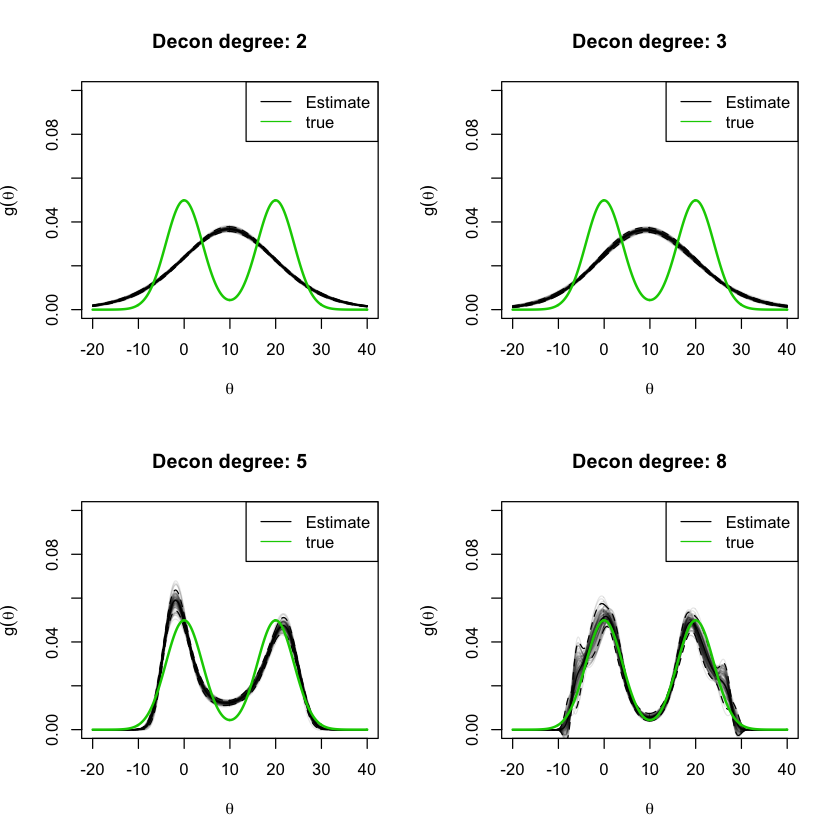

In [74]:

par(mfrow = c(2, 2))


for(deg in c(2, 3, 5, 8)){
    library('deconvolveR')
    set.seed(238923) ## for reproducibility
    N <- 5000
    Z = sample(c(0, 1), N, replace = TRUE)
    theta <- Z*rnorm(N, 0, 4) + (1-Z)*rnorm(N, 20, 4)
    X <- theta + rnorm(n = N, 0, 3)
    tau <- seq(-20, 40, 0.1)
    result <- deconv2(tau = tau, X = X, family = 'Normal', pDegree = deg, c0 = 0, sd = 3)
    library('mvtnorm')
    post = rmvnorm(100, result$stats[,2], result$cov.g)



    plot(result$stats[,1], result$stats[,2]/0.1, type = 'l', ylim = c(0, 0.1), main = paste('Decon degree:', deg),
        xlab = expression(theta), ylab = expression(g(theta)))
    lines(result$stats[,1], (result$stats[,2] + 2*result$stats[,3])/0.1 , type = 'l', lty = 2)
    lines(result$stats[,1], (result$stats[,2] - 2*result$stats[,3])/0.1 , type = 'l', lty = 2)
    legend('topright', c('Estimate', 'true'), col = c(1, 3), lty = 1)
    apply(post, 1, function(x) lines(tau, x/0.1, col = rgb(0,0,0, alpha = 0.1)))
    lines(tau, 0.5*dnorm(tau, 0, 4) + 0.5*dnorm(tau, 20, 4), col = 3, lwd = 2)
}